In [3]:
import os
from pathlib import Path

import pandas as pd
from dotenv import load_dotenv
from typing import Any

from simulator.simulator import OptionSimulator
from strategies.option_selling import OptionSellingStrategy
from simulator.chain import  OptionChainTimeline

import matplotlib.pyplot as plt
import seaborn as sns


## Load data

In [6]:
base_path = Path("data/")
assets = ["BTC", "ETH", "AVAX","NEAR","DOT","ATOM"]
ratios_df_location = base_path/ "ratios.csv"
ratios_df = pd.read_csv(ratios_df_location)
RATIO_AVAX, RATIO_NEAR, RATIO_DOT, RATIO_ATOM = 1.65,1.74,1.31,1.5

asset = "AVAX"# choose the asset under study from from assets
if asset == "BTC":
    asset_df_location = base_path/ "btc_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
elif asset == "ETH":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
elif asset == "AVAX":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.AVAX)))
    asset_df["iv_ratio"] = RATIO_AVAX
elif asset == "NEAR":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.NEAR)))
    asset_df["iv_ratio"] = RATIO_NEAR
elif asset == "DOT":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.DOT)))
    asset_df["iv_ratio"] = RATIO_DOT
elif asset == "ATOM":
    asset_df_location = base_path/ "eth_1h_deribit_all.parquet"
    asset_df = pd.read_parquet(asset_df_location)
    asset_df["spot_ratio"] = asset_df.timestamp.map(dict(zip(pd.to_datetime(ratios_df.Date),ratios_df.ATOM)))
    asset_df["iv_ratio"] = RATIO_ATOM
chain_timeline = OptionChainTimeline(asset_df)

In [7]:
asset_df

,timestamp,symbol,underlying,type,strike,expiration,open_interest,last_price,bid_price,bid_amount,...,mark_iv,underlying_index,underlying_price,delta,gamma,vega,theta,rho,spot_ratio,iv_ratio
0,2021-01-01,ETH-15JAN21-1000-C,ETH,call,1000.0,2021-01-15 08:00:00,504.0,0.0135,0.0110,405.0,...,116.09,SYN.ETH-15JAN21,764.23,0.11825,0.00116,0.29099,-1.17836,0.03091,0.005023,1.65
1,2021-01-01,ETH-15JAN21-1040-C,ETH,call,1040.0,2021-01-15 08:00:00,421.0,0.0135,0.0085,405.0,...,118.71,SYN.ETH-15JAN21,764.23,0.09354,0.00096,0.24561,-1.01709,0.02452,0.005023,1.65
2,2021-01-01,ETH-15JAN21-1080-C,ETH,call,1080.0,2021-01-15 08:00:00,889.0,0.0100,0.0065,400.0,...,121.33,SYN.ETH-15JAN21,764.23,0.07472,0.00079,0.20753,-0.87832,0.01963,0.005023,1.65
3,2021-01-01,ETH-15JAN21-460-P,ETH,put,460.0,2021-01-15 08:00:00,2048.0,0.0015,0.0010,400.0,...,121.51,SYN.ETH-15JAN21,764.23,-0.01762,0.00024,0.06392,-0.27093,-0.00562,0.005023,1.65
4,2021-01-01,ETH-15JAN21-480-P,ETH,put,480.0,2021-01-15 08:00:00,1696.0,0.0020,0.0015,400.0,...,112.95,SYN.ETH-15JAN21,764.23,-0.01983,0.00029,0.07066,-0.27840,-0.00629,0.005023,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726588,2022-06-09,ETH-9JUN22-2000-P,ETH,put,2000.0,2022-06-09 08:00:00,0.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,-0.99776,0.00010,0.00380,-0.24364,-0.01823,0.013649,1.65
3726589,2022-06-09,ETH-9JUN22-2050-C,ETH,call,2050.0,2022-06-09 08:00:00,101.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,0.00025,0.00001,0.00051,-0.00442,0.00000,0.013649,1.65
3726590,2022-06-09,ETH-9JUN22-2050-P,ETH,put,2050.0,2022-06-09 08:00:00,0.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,-0.99975,0.00001,0.00051,-0.03247,-0.01872,0.013649,1.65
3726591,2022-06-09,ETH-9JUN22-2100-C,ETH,call,2100.0,2022-06-09 08:00:00,41.0,NaN,NaN,NaN,...,128.14,SYN.ETH-9JUN22,1791.48,0.00002,0.00000,0.00005,-0.00032,0.00000,0.013649,1.65


## Define simulation

In [8]:
strategy = OptionSellingStrategy(
    trade_interval = "30d",
    time_to_maturity = "30d",
    collateralization_ratio = 1.0,
    utilization_ratio = 1.0,
    option_type = "call",
    mode = "moneyness",
    target = -0.1,
    liquidity_delta =1.0,
)

simulator = OptionSimulator(
    chain_timeline = chain_timeline,
    strategies = [strategy],
)

result = simulator.simulate("2021-01-01", "2022-06-10", starting_capital=1000000, time_step="1d")

math domain error
math domain error
math domain error
math domain error


In [ ]:
result.action_log_table.head()

,timestamp,step,spot,type,position_type,position_strike,position_maturity,position_size,position_collateral_primary,position_collateral_secondary,position_iv_start,position_price_start,liquidity_change
0,2021-01-01,0,29124.34,sell,call,32360.377778,2021-01-31,-34.335542,0,34.335542,0.917321,1850.042565,-9.364778e+05
1,2021-01-31,30,35052.57,expiration,call,32360.377778,2021-01-31,-34.335542,0,34.335542,0.917321,1850.042565,1.111111e+06
2,2021-01-31,30,35052.57,sell,call,38947.300000,2021-03-02,-33.879490,0,33.879490,1.114216,2996.964464,-1.086028e+06
3,2021-03-02,60,49648.93,expiration,call,38947.300000,2021-03-02,-33.879490,0,33.879490,1.114216,2996.964464,1.319515e+06
4,2021-03-02,60,49648.93,sell,call,55165.477778,2021-04-01,-29.473568,0,29.473568,1.072932,4014.339097,-1.345014e+06


In [ ]:
result.metrics

{'Sharpe': 0.4621598787785804,
 'Sortino': 0.6745252114184846,
 'CAGR': 0.040910311410326194,
 'MDD': -0.5224626131137438,
 'Calmar': 0.07824981248649933}

In [ ]:
result.benchmark_metrics

{'Sharpe': 0.5606788914607834,
 'Sortino': 0.8413157686390363,
 'CAGR': 0.02558715559412783,
 'MDD': -0.6192722874023584,
 'Calmar': 0.04129032147537611}

In [ ]:
result.timeline.head()

,timestamp,spot,primary,secondary,liquidity,num_long_positions,num_short_positions,size_long_positions,size_short_positions,collateral_primary,collateral_secondary,total_collaterals,positions_delta,total_delta,positions_value,total_value
0,2021-01-01,29124.34,0.0,2.18107,63522.214241,0,1,0,34.335542,0,34.335542,1000000.0,-13.602202,22.914409,-64673.132231,998849.082009
1,2021-01-02,30334.52,0.0,2.18107,66161.701118,0,1,0,34.335542,0,34.335542,1041552.186247,-14.668519,21.848093,-63603.564445,1044110.322919
2,2021-01-03,32269.84,0.0,2.18107,70382.768845,0,1,0,34.335542,0,34.335542,1108002.447437,-18.796029,17.720583,-113156.831598,1065228.384684
3,2021-01-04,33132.42,0.0,2.18107,72264.11591,0,1,0,34.335542,0,34.335542,1137619.599277,-20.24546,16.271152,-143918.041369,1065965.673817
4,2021-01-05,33291.83,0.0,2.18107,72611.800223,0,1,0,34.335542,0,34.335542,1143093.028031,-20.410659,16.105953,-132433.480576,1083271.347678


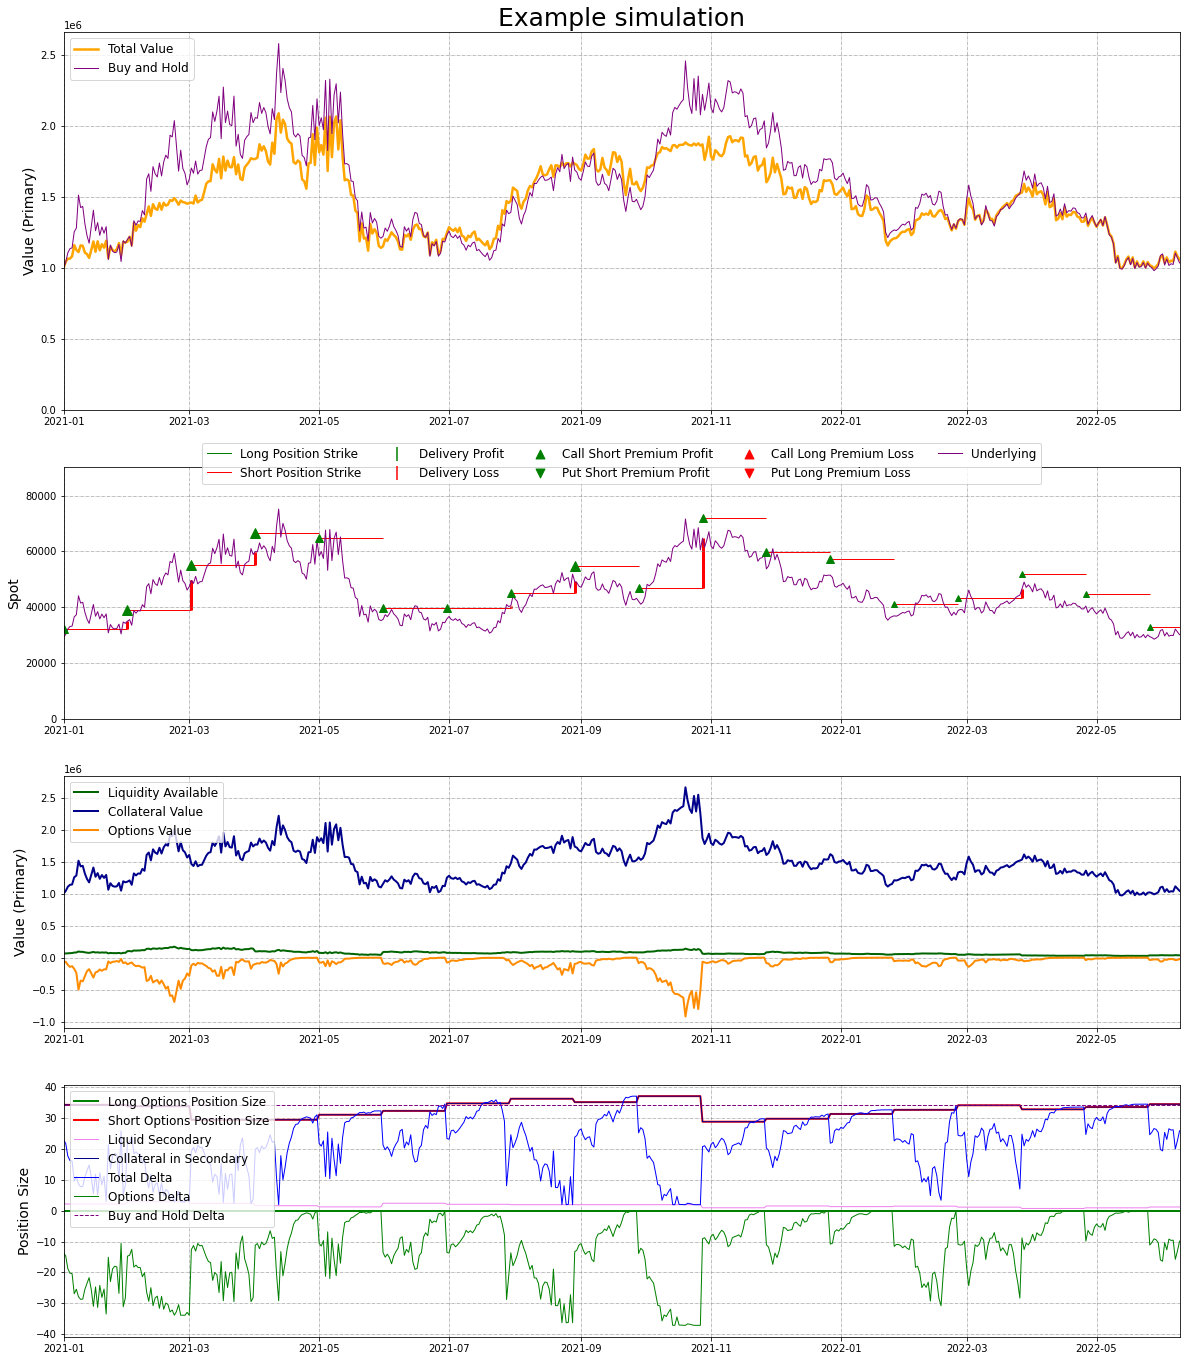

In [ ]:
result.plot_simulation("Example simulation")